In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# Assuming columns 2 and 3 should be strings:
dtypes = {2: str, 3: str} 
comments = pd.read_csv(r"C:\Users\ALOKITA\Desktop\CanWill\CSV_comments.csv", encoding='utf-8', dtype=dtypes, on_bad_lines='skip')

In [18]:
comments.head()


,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [20]:
comments.isnull()

,video_id,comment_text,likes,replies
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
691395,False,False,False,False
691396,False,False,False,False
691397,False,False,False,False
691398,False,False,False,False


In [73]:
"""comments.isnull()
Purpose: This line creates a DataFrame of the same shape as comments, but with boolean values indicating whether each element is missing (NaN - Not a Number).
Explanation:
isnull() is a Pandas DataFrame method that returns True if a value is missing and False otherwise.
This is the first step in identifying missing values.
The returned DataFrame is a mask, where True values indicate missing data.
"""

'comments.isnull()\nPurpose: This line creates a DataFrame of the same shape as comments, but with boolean values indicating whether each element is missing (NaN - Not a Number).\nExplanation:\nisnull() is a Pandas DataFrame method that returns True if a value is missing and False otherwise.\nThis is the first step in identifying missing values.\nThe returned DataFrame is a mask, where True values indicate missing data.\n'

In [16]:
comments.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [71]:
"""comments.isnull().sum()
Purpose: This line calculates the number of missing values in each column of the comments DataFrame.
Explanation:
We chain the sum() method after isnull().
sum() treats True as 1 and False as 0, so it counts the number of True values (missing values) in each column.
This provides a summary of missing values, which is essential for deciding how to handle them.
"""

'comments.isnull().sum()\nPurpose: This line calculates the number of missing values in each column of the comments DataFrame.\nExplanation:\nWe chain the sum() method after isnull().\nsum() treats True as 1 and False as 0, so it counts the number of True values (missing values) in each column.\nThis provides a summary of missing values, which is essential for deciding how to handle them.\n'

In [24]:
comments.dropna(inplace=True)

In [ ]:
"""comments.dropna(inplace=True)
Purpose: This line removes rows containing missing values from the comments DataFrame.
Explanation:
dropna() is a Pandas DataFrame method that removes rows or columns with missing values.
inplace=True modifies the original comments DataFrame directly. Without inplace=True, dropna returns a modified copy of the dataframe, and the original dataframe remains unchanged.
This is a common method for handling missing values when you want to remove incomplete records."""

In [26]:
comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [69]:
"""comments.isnull().sum()
Purpose: This line (again) calculates the number of missing values in each column of the comments DataFrame.
Explanation:
This is done after dropna() to verify that the missing values have been removed.
If dropna() was successful, this line should output a series of zeros, indicating no missing values."""

'comments.isnull().sum()\nPurpose: This line (again) calculates the number of missing values in each column of the comments DataFrame.\nExplanation:\nThis is done after dropna() to verify that the missing values have been removed.\nIf dropna() was successful, this line should output a series of zeros, indicating no missing values.'

comments.shape()

In [29]:
comments.shape

(691374, 4)

In [67]:
"""comments.shape
Purpose: This line returns the dimensions (number of rows and columns) of the comments DataFrame.
Explanation:
shape is a Pandas DataFrame attribute that returns a tuple (rows, columns).
This is useful for checking how many rows were removed by dropna() by comparing the shape before and after the operation."""

'comments.shape\nPurpose: This line returns the dimensions (number of rows and columns) of the comments DataFrame.\nExplanation:\nshape is a Pandas DataFrame attribute that returns a tuple (rows, columns).\nThis is useful for checking how many rows were removed by dropna() by comparing the shape before and after the operation.'

In [31]:
!pip install textblob

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 4.6 MB/s eta 0:00:00


In [33]:
from textblob import TextBlob

In [35]:
pwd


'C:\\Users\\ALOKITA\\Desktop\\CanWill\\Sentiment_Analysis'

In [37]:
polarity = []

for comment in comments['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)
    

In [ ]:
'''polarity.append(TextBlob(comment).sentiment.polarity) step by step:

comment:

This represents a single comment from the 'comment_text' column of your DataFrame. It's the string of text that you want to analyze for sentiment.
TextBlob(comment):

This creates a TextBlob object from the comment string.
TextBlob is a class from the textblob library that provides a simple API for natural language processing tasks, including sentiment analysis.
Essentially, it takes your text and turns it into an object that can be analyzed.
.sentiment:

The sentiment attribute of a TextBlob object returns a Sentiment object.
This Sentiment object contains two properties: polarity and subjectivity.
.sentiment.polarity:

This accesses the polarity property of the Sentiment object.
polarity is a floating-point number that represents the sentiment of the text.
It ranges from -1.0 to 1.0:
-1.0 means the text is extremely negative.
0.0 means the text is neutral.
1.0 means the text is extremely positive.
polarity.append(...):

polarity is a list that you initialized earlier in your code.
The append() method adds the calculated sentiment.polarity value to the end of the polarity list.
Therefore, this line takes the resulting polarity score, and adds it to the list of polarity scores.
In simpler terms:

This line does the following:

Takes a comment.
Analyzes its sentiment using TextBlob.
Extracts the polarity score (how positive or negative the comment is).
Adds that score to a list of polarity scores.'''

In [45]:
comments['polarity']  = polarity 
"""When you use square brackets [] with a DataFrame and a string (like 'polarity'), you're either:
Accessing an existing column: If a column named 'polarity' already exists, this would retrieve that column.
Creating a new column: If a column named 'polarity' does not exist, this creates a new column with that name."""

"When you use square brackets [] with a DataFrame and a string (like 'polarity'), you're either:\nAccessing an existing column: If a column named 'polarity' already exists, this would retrieve that column.\nCreating a new column: If a column named 'polarity' does not exist, this creates a new column with that name."

In [41]:
len(polarity)

691374

In [47]:
filter1 = comments['polarity'] == 1

In [49]:
comments_positive = comments[filter1]

In [51]:
"""filter1 = comments['polarity'] == 1

comments['polarity']: This accesses the 'polarity' column of your comments DataFrame. Remember, this column contains the sentiment polarity scores (ranging from -1 to 1) that you calculated earlier using TextBlob.
== 1: This is a comparison operator. It checks if each value in the 'polarity' column is exactly equal to 1.
comments['polarity'] == 1: This performs the comparison for every value in the 'polarity' column. The result is a Pandas Series (like a column) of boolean values (True or False).
filter1 = ...: This assigns the resulting boolean Series to the variable filter1.
filter1 now acts as a "mask." It has the same number of rows as your comments DataFrame.
Where a row in comments has a 'polarity' value of 1, the corresponding value in filter1 will be True.
Where a row in comments has a 'polarity' value other than 1, the corresponding value in filter1 will be False."""

'filter1 = comments[\'polarity\'] == 1\n\ncomments[\'polarity\']: This accesses the \'polarity\' column of your comments DataFrame. Remember, this column contains the sentiment polarity scores (ranging from -1 to 1) that you calculated earlier using TextBlob.\n== 1: This is a comparison operator. It checks if each value in the \'polarity\' column is exactly equal to 1.\ncomments[\'polarity\'] == 1: This performs the comparison for every value in the \'polarity\' column. The result is a Pandas Series (like a column) of boolean values (True or False).\nfilter1 = ...: This assigns the resulting boolean Series to the variable filter1.\nfilter1 now acts as a "mask." It has the same number of rows as your comments DataFrame.\nWhere a row in comments has a \'polarity\' value of 1, the corresponding value in filter1 will be True.\nWhere a row in comments has a \'polarity\' value other than 1, the corresponding value in filter1 will be False.'

In [53]:
"""The concept of a "mask" in computing is quite versatile, and its meaning can vary depending on the context. However, the underlying principle remains the same: a mask is used to selectively modify or extract portions of data. Here's a breakdown of its common applications:

1. Bitwise Operations:

In this context, a mask is a sequence of bits used to manipulate individual bits within a binary value.
It allows you to:
Set specific bits to 1.
Clear specific bits to 0.
Check the state of specific bits.
This is often used in low-level programming, network protocols, and hardware interactions.   
2. Data Filtering:

In data analysis (like with Pandas), a mask is a boolean array (or Series) used to select specific rows or elements from a dataset.
True values indicate the elements to be included, and False values indicate the elements to be excluded.
This is a powerful way to filter and subset data based on certain conditions.
3. Image Processing:

In image editing, a mask is used to selectively apply effects or modifications to specific areas of an image.
It allows you to isolate parts of an image for precise editing.
For example, you might use a mask to change the color of a specific object in a photograph without affecting the background.   
  
4. Network Subnetting:

In networking, a subnet mask is used to divide an IP network into smaller subnetworks.
It defines which portion of an IP address represents the network and which portion represents the host.
This is essential for efficient network routing and management.
  
Key Idea:

Regardless of the specific application, a mask acts as a "filter" or "template" that controls which parts of the data are affected.
In essence, a mask is a tool that allows you to selectively focus on or modify specific parts of data, whether it's bits, data rows, image pixels, or network addresses.

   


Sources and related content
"""

'The concept of a "mask" in computing is quite versatile, and its meaning can vary depending on the context. However, the underlying principle remains the same: a mask is used to selectively modify or extract portions of data. Here\'s a breakdown of its common applications:\n\n1. Bitwise Operations:\n\nIn this context, a mask is a sequence of bits used to manipulate individual bits within a binary value.\nIt allows you to:\nSet specific bits to 1.\nClear specific bits to 0.\nCheck the state of specific bits.\nThis is often used in low-level programming, network protocols, and hardware interactions. \xa0 \n2. Data Filtering:\n\nIn data analysis (like with Pandas), a mask is a boolean array (or Series) used to select specific rows or elements from a dataset.\nTrue values indicate the elements to be included, and False values indicate the elements to be excluded.\nThis is a powerful way to filter and subset data based on certain conditions.\n3. Image Processing:\n\nIn image editing, a mas

In [55]:
""" you're describing a common and powerful technique in Pandas for creating subsets of DataFrames based on filtering conditions. Let's break down what's happening in comments_positive = comments[filter1]:

Understanding the Components:

comments: This is your original Pandas DataFrame. It's the source data you're working with.
filter1: This is a boolean Series (a column-like structure) that acts as a mask. It contains True values for the rows you want to select and False values for the rows you want to exclude.
comments[filter1]: This is the core of the filtering operation. It uses the boolean Series filter1 to select rows from the comments DataFrame.
comments_positive = ...: This assigns the resulting subset (the filtered rows) to a new DataFrame called comments_positive.
How the Filtering Works:

When you use a boolean Series within square brackets [] to index a DataFrame, Pandas interprets it as a row selection mask.
It iterates through the filter1 Series.
For each row where filter1 is True, Pandas includes that row in the new comments_positive DataFrame.
For each row where filter1 is False, Pandas excludes that row.
Example:

Python

import pandas as pd

data = {'comment': ['Great product!', 'Not good.', 'Love it!', 'Terrible'],
        'rating': [5, 1, 4, 1]}
comments = pd.DataFrame(data)

# Create a boolean Series (filter)
filter1 = comments['rating'] > 3  # Select comments with ratings > 3

# Apply the filter
comments_positive = comments[filter1]

print(comments_positive)
Output:

         comment  rating
0  Great product!       5
2        Love it!       4
Key Points:

Boolean Series: The filter1 variable must be a Pandas Series of boolean values (True/False).
Creating the filter: The filter can be created in a multitude of ways. Common ways are by comparing column values to a value as in the example above, or by using the isin() method to check if a column value is in a list of values.
New DataFrame: The result is a new DataFrame, comments_positive, containing only the selected rows. The original comments DataFrame remains unchanged.
Efficiency: This is a very efficient way to filter DataFrames in Pandas.
This filtering technique is fundamental for data cleaning, analysis, and manipulation in Pandas."""

" you're describing a common and powerful technique in Pandas for creating subsets of DataFrames based on filtering conditions. Let's break down what's happening in comments_positive = comments[filter1]:\n\nUnderstanding the Components:\n\ncomments: This is your original Pandas DataFrame. It's the source data you're working with.\nfilter1: This is a boolean Series (a column-like structure) that acts as a mask. It contains True values for the rows you want to select and False values for the rows you want to exclude.\ncomments[filter1]: This is the core of the filtering operation. It uses the boolean Series filter1 to select rows from the comments DataFrame.\ncomments_positive = ...: This assigns the resulting subset (the filtered rows) to a new DataFrame called comments_positive.\nHow the Filtering Works:\n\nWhen you use a boolean Series within square brackets [] to index a DataFrame, Pandas interprets it as a row selection mask.\nIt iterates through the filter1 Series.\nFor each row wh

In [57]:
negative_comments = comments['polarity'] == -1

In [59]:
comments_negative_filtered = comments[negative_comments]

In [61]:
comments_negative_filtered.head(10)

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0
1932,-Ifnaxi2LQg,this is the worst thing i've heard. ever.,0,0,-1.0
2043,B7YaMkCl3XA,Economy is horrible in Cuba. It's going to be ...,0,0,-1.0
2088,B7YaMkCl3XA,Sub to me if this is terrible,0,1,-1.0
2192,5ywKal6-anc,PATHETIC,1,0,-1.0
2410,EVp4-qjWVJE,I don't like this sportscaster sounds very an...,0,0,-1.0


In [63]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [65]:
from wordcloud import WordCloud, STOPWORDS

In [75]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [77]:
"""we convert STOPWORDS to a set. Here's the explanation:

1. Efficiency of set for Membership Tests:

STOPWORDS (from the wordcloud library) is typically a list or other iterable containing common words like "the," "a," "is," etc.
When the WordCloud object is generating the word cloud, it needs to check if each word in your text is a stop word.
If STOPWORDS is a list, checking if a word is a stop word would involve iterating through the entire list for each word in your text. This is an O(n) operation, where n is the length of the list.
However, if STOPWORDS is a set, checking if a word is a stop word involves a hash table lookup, which is an O(1) operation on average.
Therefore, converting STOPWORDS to a set significantly speeds up the stop word removal process, especially when dealing with large amounts of text.
2. Removing Duplicates (Less Relevant Here):

Sets in Python automatically remove duplicate elements.
In the case of STOPWORDS, it's unlikely that there are duplicates, but converting to a set ensures that.
In essence:

Converting STOPWORDS to a set is primarily done for performance reasons. It makes the stop word removal process much faster.
Using a set for membership testing is a common practice in Python when you need to check if an element is in a collection frequently.
Code Example:

Python

from wordcloud import STOPWORDS

# Original STOPWORDS (likely a list or other iterable)
print(type(STOPWORDS))

# Convert to a set
stop_words_set = set(STOPWORDS)
print(type(stop_words_set))
By converting the list of stop words to a set, you are optimizing the code for faster execution."""

'we convert STOPWORDS to a set. Here\'s the explanation:\n\n1. Efficiency of set for Membership Tests:\n\nSTOPWORDS (from the wordcloud library) is typically a list or other iterable containing common words like "the," "a," "is," etc.\nWhen the WordCloud object is generating the word cloud, it needs to check if each word in your text is a stop word.\nIf STOPWORDS is a list, checking if a word is a stop word would involve iterating through the entire list for each word in your text. This is an O(n) operation, where n is the length of the list.\nHowever, if STOPWORDS is a set, checking if a word is a stop word involves a hash table lookup, which is an O(1) operation on average.\nTherefore, converting STOPWORDS to a set significantly speeds up the stop word removal process, especially when dealing with large amounts of text.\n2. Removing Duplicates (Less Relevant Here):\n\nSets in Python automatically remove duplicate elements.\nIn the case of STOPWORDS, it\'s unlikely that there are dupl

In [79]:
### for wordcloud , we need to frame our 'comment_text' feature into string ..
total_comments_positive = ' '.join(comments_positive['comment_text'])

In [81]:
wordcloud = WordCloud(stopwords = set(STOPWORDS)).generate(total_comments_positive)

(-0.5, 399.5, 199.5, -0.5)

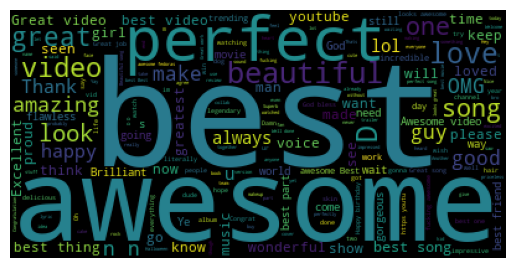

In [89]:
plt.imshow(wordcloud)
plt.axis('off')

In [91]:
!pip install emoji==2.2.0

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234934 sha256=c738e1beacf4a0e188500ef4e25e0eb30a382f1549e0a628038418a99bcf357e
  Stored in directory: c:\users\alokita\appdata\local\pip\cache\wheels\e8\33\a1\3977489dc0d0c30f1fb3e683bc24c077a630ba8afe4e31435e
Successfully built emoji


In [93]:
import emoji

In [95]:
comments['comment_text'].head(6)

0                    Logan Paul it's yo big day ‼️‼️‼️
1    I've been following you from the start of your...
2                   Say hi to Kong and maverick for me
3                                  MY FAN . attendance
4                                           trending 😉
5                              #1 on trending AYYEEEEE
Name: comment_text, dtype: object

In [97]:
emoji.__version__

'2.2.0'

In [99]:
[char for char in comment if char in emoji.EMOJI_DATA]

['😍', '❤', '❤', '❤', '😘']

In [101]:
all_emojis_list = []

for comment in comments['comment_text'].dropna(): ## in case u have missing values , call dropna()
    for char in comment:
        if char in emoji.EMOJI_DATA:
            all_emojis_list.append(char)

In [103]:
all_emojis_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [105]:
from collections import Counter

In [107]:
Counter(all_emojis_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [109]:
"""!pip install emoji==2.2.0: Installs the emoji library, specifically version 2.2.0. This library is used for detecting and working with emojis in text.
import emoji: Imports the emoji module, making its functions available.
comments['comment_text'].head(6): Displays the first 6 comments from the 'comment_text' column of your comments DataFrame. This allows you to see some sample comments and check for the presence of emojis.
emoji.__version__: Prints the version of the emoji library that you installed. This is useful for verifying that you have the correct version.
2. Incorrect Emoji list attempt:

Python

[char for char in comment if char in emoji.EMOJI_DATA], print(type(emoji_list)), emoji_list,
[char for char in comment if char in emoji.EMOJI_DATA]: This line attempts to create a list of emojis, but has two issues.
First, the variable comment is not defined in this scope. Therefore, this line will create an error.
Second, the results of this list comprehension are not assigned to a variable.
print(type(emoji_list)), emoji_list: Because emoji_list has not been defined, this will create an error.
3. Emoji Extraction:

Python

all_emojis_list = []
for comment in comments['comment_text'].dropna():
    for char in comment:
        if char in emoji.EMOJI_DATA:
            all_emojis_list.append(char)
all_emojis_list[0:10]
all_emojis_list = []: Initializes an empty list called all_emojis_list to store the extracted emojis.
for comment in comments['comment_text'].dropna()::
Iterates through each comment in the 'comment_text' column of the comments DataFrame.
.dropna(): This is important because it skips any rows where the 'comment_text' is missing (NaN), preventing errors.
for char in comment:: Iterates through each character in the current comment string.
if char in emoji.EMOJI_DATA::
Checks if the current character (char) is present in the emoji.EMOJI_DATA set.
emoji.EMOJI_DATA is a set containing all the known emojis.
all_emojis_list.append(char): If the character is an emoji, it's added to the all_emojis_list.
all_emojis_list[0:10]: Displays the first 10 emojis that were extracted. This allows you to see a sample of the emojis found.
4. Emoji Counting:

Python

from collections import Counter
Counter(all_emojis_list).most_common(10)
from collections import Counter: Imports the Counter class from the collections module. Counter is used for counting the occurrences of elements in a list.
Counter(all_emojis_list): Creates a Counter object from the all_emojis_list. This counts how many times each emoji appears in the list.
.most_common(10): Returns a list of the 10 most common emojis and their counts, in descending order. Each element in the list is a tuple (emoji, count).
In Summary:

This code performs the following tasks:

Installs and imports the emoji library.
Inspects the 'comment_text' column of the DataFrame.
Iterates through the comments and extracts all the emojis.
Counts the occurrences of each emoji using Counter.
Displays the 10 most common emojis and their counts."""

"!pip install emoji==2.2.0: Installs the emoji library, specifically version 2.2.0. This library is used for detecting and working with emojis in text.\nimport emoji: Imports the emoji module, making its functions available.\ncomments['comment_text'].head(6): Displays the first 6 comments from the 'comment_text' column of your comments DataFrame. This allows you to see some sample comments and check for the presence of emojis.\nemoji.__version__: Prints the version of the emoji library that you installed. This is useful for verifying that you have the correct version.\n2. Incorrect Emoji list attempt:\n\nPython\n\n[char for char in comment if char in emoji.EMOJI_DATA], print(type(emoji_list)), emoji_list,\n[char for char in comment if char in emoji.EMOJI_DATA]: This line attempts to create a list of emojis, but has two issues.\nFirst, the variable comment is not defined in this scope. Therefore, this line will create an error.\nSecond, the results of this list comprehension are not ass